1. Загрузить выборку с сайта Kaggle.com.
2. Провести анализ полученной выборки на наличие пропущенных данных.
3. Заполнить пропуски в данных
4. Выявить выбросы по показателям и удалить их

In [1]:
# импорт пакетов
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [19]:
df=pd.read_csv('/content/gender_classification_v7.csv')

In [18]:
# выведем размер и тип данных
print(df.shape)
print(df.dtypes)

(5001, 8)
long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object


In [20]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['long_hair' 'forehead_width_cm' 'forehead_height_cm' 'nose_wide'
 'nose_long' 'lips_thin' 'distance_nose_to_lip_long']


In [21]:
 # отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['gender']


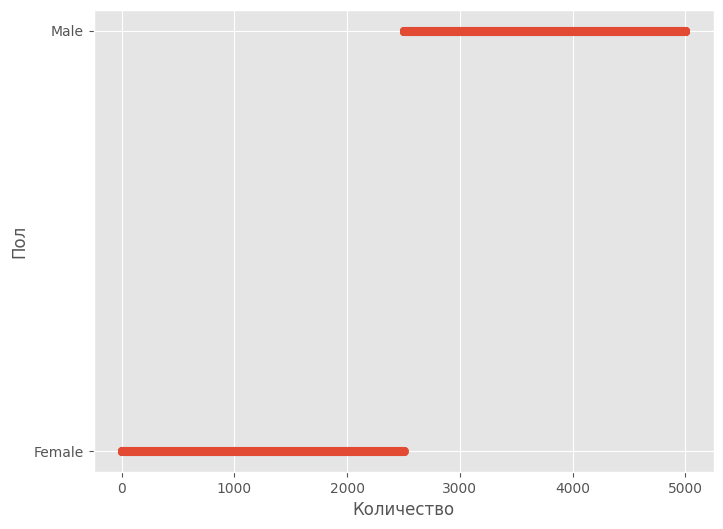

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.gender.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Пол', fontsize=12)
plt.show()

In [23]:
print(df.describe())

         long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000

In [9]:
# заменяем данные в столбце
TEY= df['long_hair']
TEY=TEY.replace(0, np.NaN)

In [10]:
#заменяем данные во всем наборе
cols = df.columns[:8] # выбираем только входные столбцы
df_new = df[cols].replace(0, np.NaN)
df_new['gender']=df['gender']
df_new

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1.0,NaN,1.0,1.0,Male
1,NaN,14.0,5.4,NaN,NaN,1.0,NaN,Female
2,NaN,11.8,6.3,1.0,1.0,1.0,1.0,Male
3,NaN,14.4,6.1,NaN,1.0,1.0,1.0,Male
4,1.0,13.5,5.9,NaN,NaN,NaN,NaN,Female
...,...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,NaN,NaN,NaN,NaN,Female
4997,1.0,11.9,5.4,NaN,NaN,NaN,NaN,Female
4998,1.0,12.9,5.7,NaN,NaN,NaN,NaN,Female
4999,1.0,13.2,6.2,NaN,NaN,NaN,NaN,Female


In [11]:
# смотрим количество пропусков по каждой переменной
print(df_new.shape[0])
df_new.isnull().sum()*100/df_new.shape[0]

5001


long_hair                    13.037393
forehead_width_cm             0.000000
forehead_height_cm            0.000000
nose_wide                    50.609878
nose_long                    49.210158
lips_thin                    50.689862
distance_nose_to_lip_long    50.109978
gender                        0.000000
dtype: float64

In [12]:
# или так
for col in df_new.columns:
    pct_missing = np.mean(df_new[col].isnull())
    k=round(pct_missing*100)
    print('{} - {}%'.format(col, k))

long_hair - 13%
forehead_width_cm - 0%
forehead_height_cm - 0%
nose_wide - 51%
nose_long - 49%
lips_thin - 51%
distance_nose_to_lip_long - 50%
gender - 0%


In [13]:
# отбрасываем строки с большим количеством пропусков
df_del= df_new.dropna()
df_del

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
5,1.0,13.0,6.8,1.0,1.0,1.0,1.0,Male
11,1.0,15.5,5.8,1.0,1.0,1.0,1.0,Male
16,1.0,15.2,6.0,1.0,1.0,1.0,1.0,Male
20,1.0,14.6,6.3,1.0,1.0,1.0,1.0,Male
21,1.0,12.8,7.0,1.0,1.0,1.0,1.0,Male
...,...,...,...,...,...,...,...,...
4980,1.0,14.1,5.2,1.0,1.0,1.0,1.0,Male
4987,1.0,12.1,6.2,1.0,1.0,1.0,1.0,Male
4992,1.0,14.1,7.0,1.0,1.0,1.0,1.0,Male
4994,1.0,12.9,7.0,1.0,1.0,1.0,1.0,Male


In [14]:
#Отбрасывание признаков
cols_to_drop = ['lips_thin']
df_less_lips_thin = df_del.drop(cols_to_drop, axis=1)
df_less_lips_thin

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,distance_nose_to_lip_long,gender
5,1.0,13.0,6.8,1.0,1.0,1.0,Male
11,1.0,15.5,5.8,1.0,1.0,1.0,Male
16,1.0,15.2,6.0,1.0,1.0,1.0,Male
20,1.0,14.6,6.3,1.0,1.0,1.0,Male
21,1.0,12.8,7.0,1.0,1.0,1.0,Male
...,...,...,...,...,...,...,...
4980,1.0,14.1,5.2,1.0,1.0,1.0,Male
4987,1.0,12.1,6.2,1.0,1.0,1.0,Male
4992,1.0,14.1,7.0,1.0,1.0,1.0,Male
4994,1.0,12.9,7.0,1.0,1.0,1.0,Male


In [26]:
#Внесение недостающих значений
med = df_less_lips_thin['distance_nose_to_lip_long'].median()
print(med)
df_less_lips_thin['distance_nose_to_lip_long'] = df_less_lips_thin['distance_nose_to_lip_long'].fillna(med)
df_less_lips_thin

1.0


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,distance_nose_to_lip_long,gender
5,1.0,13.0,6.8,1.0,1.0,1.0,Male
11,1.0,15.5,5.8,1.0,1.0,1.0,Male
16,1.0,15.2,6.0,1.0,1.0,1.0,Male
20,1.0,14.6,6.3,1.0,1.0,1.0,Male
21,1.0,12.8,7.0,1.0,1.0,1.0,Male
...,...,...,...,...,...,...,...
4980,1.0,14.1,5.2,1.0,1.0,1.0,Male
4987,1.0,12.1,6.2,1.0,1.0,1.0,Male
4992,1.0,14.1,7.0,1.0,1.0,1.0,Male
4994,1.0,12.9,7.0,1.0,1.0,1.0,Male


In [34]:
df_numeric = df_new.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values


for col in numeric_cols:
    missing = df_new[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # выполняет только вставку для столбцов, в которых отсутствуют значения.
        print('подстановка пропущенных значений для: {}'.format(col))
        med = df_new[col].median()
        df_new[col] = df_new[col].fillna(med)
df_new

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1.0,1.0,1.0,1.0,Male
1,1.0,14.0,5.4,1.0,1.0,1.0,1.0,Female
2,1.0,11.8,6.3,1.0,1.0,1.0,1.0,Male
3,1.0,14.4,6.1,1.0,1.0,1.0,1.0,Male
4,1.0,13.5,5.9,1.0,1.0,1.0,1.0,Female
...,...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,1.0,1.0,1.0,1.0,Female
4997,1.0,11.9,5.4,1.0,1.0,1.0,1.0,Female
4998,1.0,12.9,5.7,1.0,1.0,1.0,1.0,Female
4999,1.0,13.2,6.2,1.0,1.0,1.0,1.0,Female


In [39]:
#Одномерное восстановление признаков
from sklearn.impute import SimpleImputer
# Создаём объект класса SimpleImputer с параметрами:
# - помечаем пропуски, как np.nan
# - указываем арифметическое среднее в качестве стратегии заполнения
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Настраиваем алгоритм обучения
imputer = imputer.fit(df_numeric)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imputer.transform(df_numeric.loc[:,:]), columns = df_numeric.columns)

df_new1.round(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,11.8,6.1,1.0,1.0,1.0,1.0
1,1.0,14.0,5.4,1.0,1.0,1.0,1.0
2,1.0,11.8,6.3,1.0,1.0,1.0,1.0
3,1.0,14.4,6.1,1.0,1.0,1.0,1.0
4,1.0,13.5,5.9,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,1.0,1.0,1.0,1.0
4997,1.0,11.9,5.4,1.0,1.0,1.0,1.0
4998,1.0,12.9,5.7,1.0,1.0,1.0,1.0
4999,1.0,13.2,6.2,1.0,1.0,1.0,1.0


In [41]:
#Многомерное восстановление признаков
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
# Настраиваем алгоритм обучения
imp = imp.fit(df_numeric)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imp.transform(df_numeric.loc[:,:]), columns = df_numeric.columns)

df_new1.round(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,11.8,6.1,1.0,1.0,1.0,1.0
1,1.0,14.0,5.4,1.0,1.0,1.0,1.0
2,1.0,11.8,6.3,1.0,1.0,1.0,1.0
3,1.0,14.4,6.1,1.0,1.0,1.0,1.0
4,1.0,13.5,5.9,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,1.0,1.0,1.0,1.0
4997,1.0,11.9,5.4,1.0,1.0,1.0,1.0
4998,1.0,12.9,5.7,1.0,1.0,1.0,1.0
4999,1.0,13.2,6.2,1.0,1.0,1.0,1.0


<Axes: >

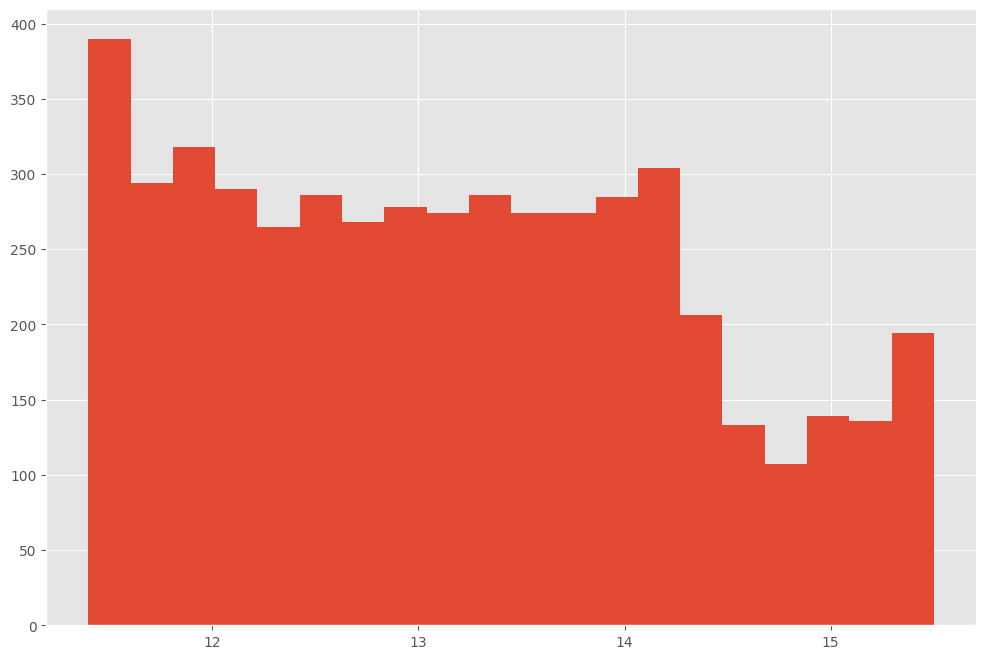

In [49]:
df_new1['forehead_width_cm'].hist(bins=20)

<Axes: >

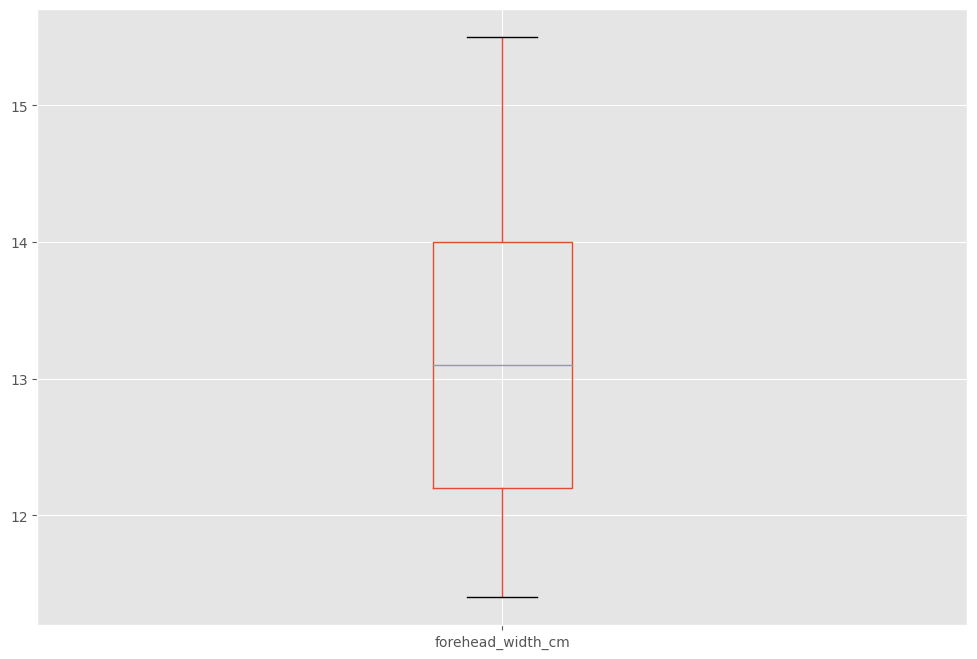

In [48]:
df_new1.boxplot(column=['forehead_width_cm'])

In [50]:
df_new['forehead_width_cm'].describe()

count    5001.000000
mean       13.181484
std         1.107128
min        11.400000
25%        12.200000
50%        13.100000
75%        14.000000
max        15.500000
Name: forehead_width_cm, dtype: float64

Выбросов нет

In [ ]:
df_new_del = df_new1.drop(np.where(df_new1['TEY'] <= 110)[0])